# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

# Data Loading and Initial Inspection

In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 2.98 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
neflix_df = pd.read_csv("/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv")

In [4]:
neflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
neflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [6]:
neflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
neflix_df.shape

(7787, 12)

In [8]:
neflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


- There are total 11 columns in the neflix dataset
- The null values are presented significantly in 'director', followed by 'cast', 'country' and lastly 'rating'

# Imputation of Missing Value

In [9]:
# Handling missing value of director
neflix_df['director'] = neflix_df['director'].fillna('Unknown')

# Handling missinh value of cast
neflix_df['cast'] = neflix_df['cast'].fillna('Unknown')


In [10]:
# numeric - median
# categorical - mode

mode_country = neflix_df['country'].mode()[0]
neflix_df['country'] = neflix_df['country'].fillna(mode_country)

In [11]:
#drop date added and rating columns
neflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [12]:
neflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [13]:
# create year and month
neflix_df['date_added']= pd.to_datetime(neflix_df['date_added'], format='mixed',dayfirst=False)
neflix_df['year_added'] = neflix_df['date_added'].dt.year
neflix_df['month_added'] = neflix_df['date_added'].dt.month

# EDA and Visualization

In [14]:
neflix_df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


In [15]:
neflix_df['country'].value_counts()

,count
country,
United States,3051
India,923
United Kingdom,396
Japan,224
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [16]:
neflix_df['rating'].value_counts()

,count
rating,
TV-MA,2861
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194


- There are two types of content types, which are movie and tv show.
- There are 14 types of ratings among the content.

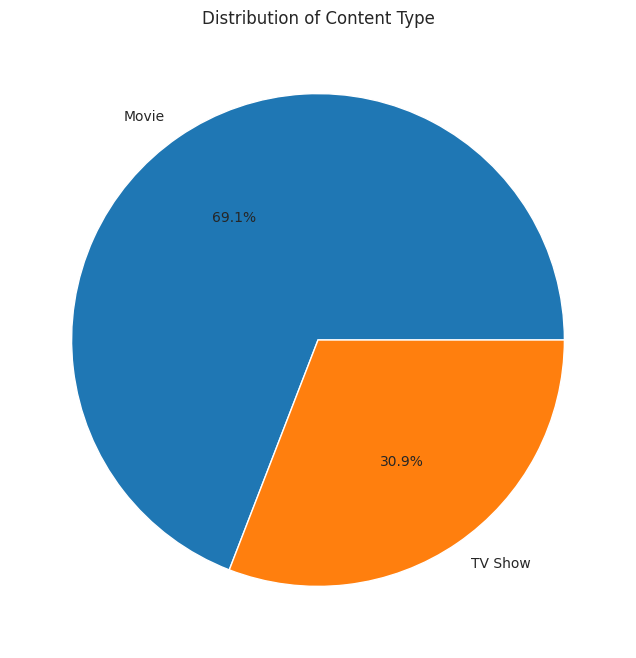

In [17]:
# Distribution of content type
plt.figure(figsize=(8,8))
plt.pie(neflix_df['type'].value_counts(),labels=neflix_df['type'].value_counts().index,autopct='%1.1f%%')
plt.title('Distribution of Content Type')
plt.show()

- Most of the contents in Netflix are Movie, which is around 70%.

<Figure size 1400x800 with 0 Axes>

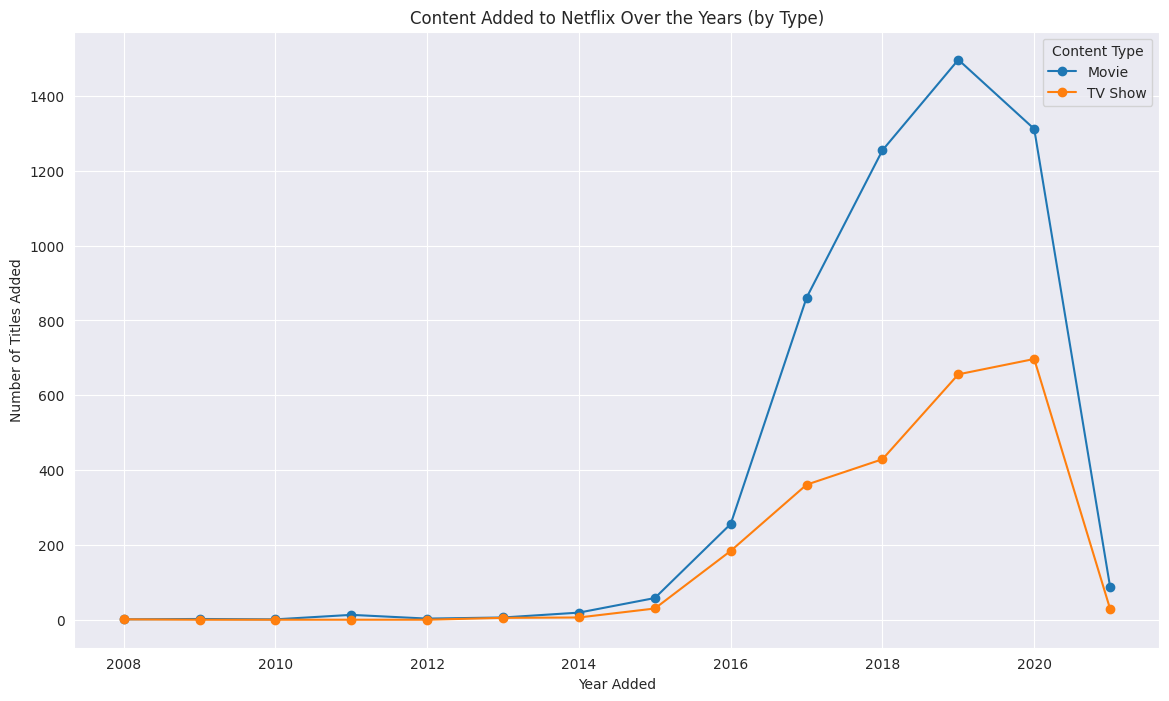

In [18]:
# Content over the time
content_over_time = neflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [20]:
neflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [21]:
# Get the most popular genres
genre = neflix_df.assign(genre=neflix_df['listed_in'].str.split(', ')).explode('genre')
genre

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries


In [22]:
# check types of genres
genre.columns
genre_value_counts = genre['genre'].value_counts().reset_index()
# # rename the columns for 'genre'
genre_value_counts.columns=['genre','count']
genre_value_counts.head()

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786


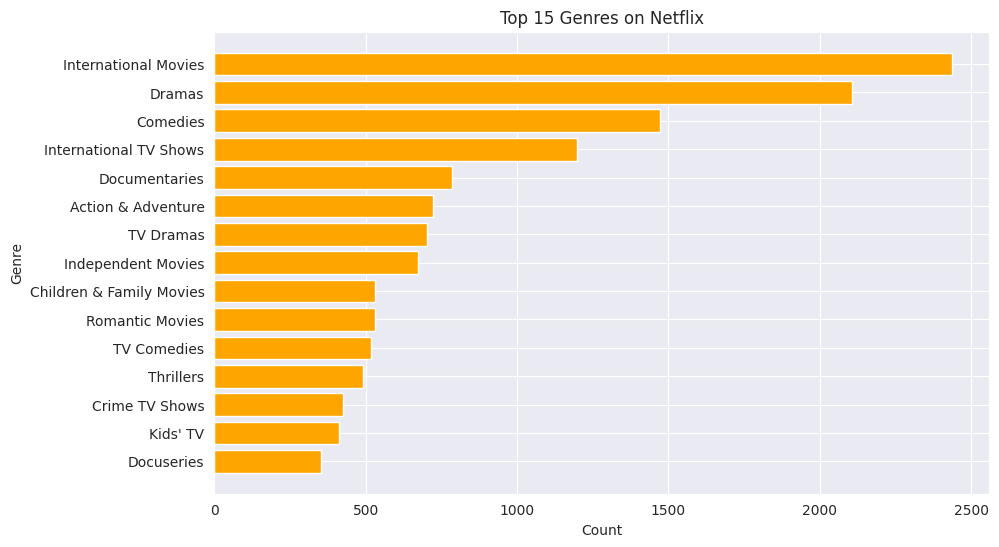

In [23]:
# Select top 15 for plotting
top_15_genres = genre_value_counts.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_15_genres['genre'], top_15_genres['count'], color='orange')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 15 Genres on Netflix')
plt.gca().invert_yaxis()
plt.show()

- International movies is the most commen genre, highlighting the neflix's global content strategy, followed by dramas, comedies, international tv shows and documentaries.

In [25]:
(neflix_df['content_age'] < 0).value_counts()

,count
content_age,
False,7758
True,12


In [26]:
neflix_df[neflix_df['content_age'] < 0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,content_age
583,s584,TV Show,Arrested Development,Unknown,"Jason Bateman, Portia de Rossi, Will Arnett, M...",United States,2018-05-29,2019,TV-MA,5 Seasons,TV Comedies,It's the Emmy-winning story of a wealthy famil...,2018,5,-1
1025,s1026,TV Show,BoJack Horseman,Unknown,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,2019-10-25,2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...,2019,10,-1
2311,s2312,TV Show,Fuller House,Unknown,"Candace Cameron Bure, Jodie Sweetin, Andrea Ba...",United States,2019-12-06,2020,TV-PG,5 Seasons,TV Comedies,The Tanner family’s adventures continue as DJ ...,2019,12,-1
2602,s2603,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,2017-07-01,2018,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,2017,7,-1
2741,s2742,TV Show,Hilda,Unknown,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States",2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020,12,-1
2981,s2982,Movie,Incoming,Eric Zaragosa,"Scott Adkins, Aaron McCusker, Vahldin Prelic, ...","Serbia, United States",2018-10-26,2019,TV-MA,89 min,"Action & Adventure, Sci-Fi & Fantasy",When an imprisoned terrorist cell hijacks a hi...,2018,10,-1
3098,s3099,TV Show,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland",2013-03-31,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Ken Bruen's bestselling crime novels leap to l...,2013,3,-3
3926,s3927,TV Show,Maradona in Mexico,Unknown,Diego Armando Maradona,"Argentina, United States, Mexico",2019-11-13,2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon...",2019,11,-1
5493,s5494,TV Show,Sense8,Unknown,"Tuppence Middleton, Brian J. Smith, Doona Bae,...",United States,2016-12-23,2018,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","From the creators of ""The Matrix"" and ""Babylon...",2016,12,-2
6462,s6463,TV Show,The Hook Up Plan,Unknown,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,2019-10-11,2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her...",2019,10,-1


- Top director on Neflix is Jan Suter, followed by Raul Campos, Marcus Raboy, Jay Karas and Cathy Garcia-Molina.

In [29]:
# Distribution of content duration
movie_df = neflix_df[neflix_df['type'] == 'Movie'].copy()
tv_show_df = neflix_df[neflix_df['type'] == 'TV Show'].copy()

In [30]:
movie_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,content_age
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8


In [31]:
# Replace the strings in the duration
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(int)
tv_show_df['duration'] = tv_show_df['duration'].str.replace(r'[^0-9]', '', regex=True).astype(int)

In [32]:
tv_show_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,content_age
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,0
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,0
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,1


/tmp/ipython-input-1199151582.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=tv_show_df,x='duration',ax=axes[1], palette='red', bins=50, kde=True).set_title('Distribution of TV Show Duration')


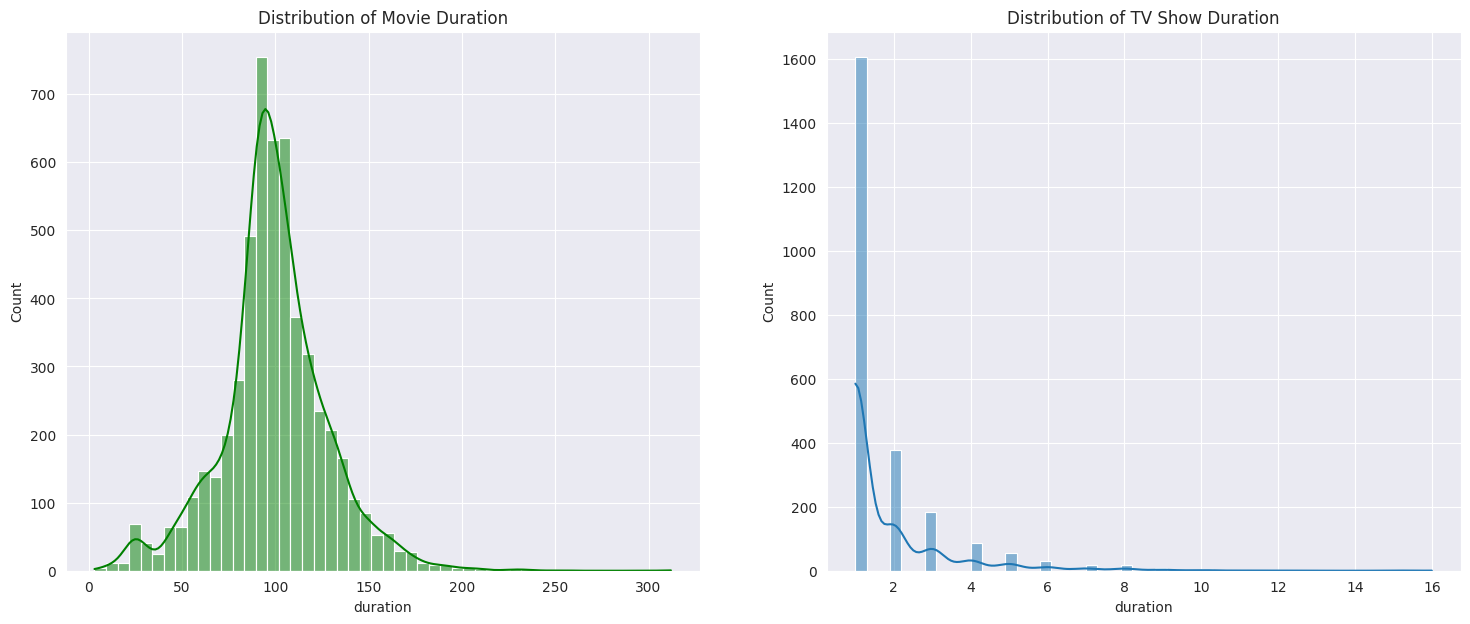

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(18,7))
sns.histplot(data=movie_df,x='duration',ax=axes[0], bins=50, kde=True, color='green').set_title('Distribution of Movie Duration')
sns.histplot(data=tv_show_df,x='duration',ax=axes[1], palette='red', bins=50, kde=True).set_title('Distribution of TV Show Duration')
plt.show()

- Mojority of the movies have the duration between 80 to 120 minutes.
- Majority of the tv shows are short-lived with having 1 season, reflecting Neflix only focus on limited series or renewing the most successful tv shows only.

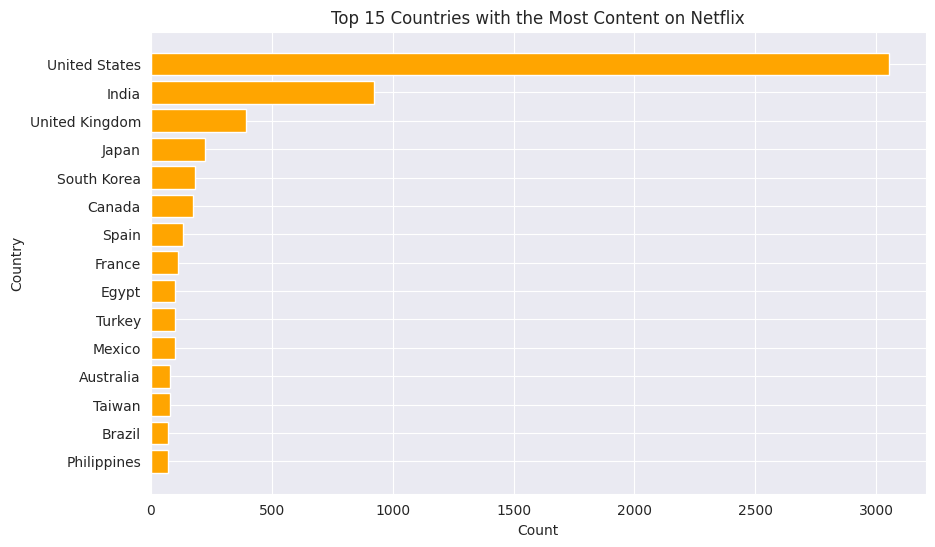

In [34]:
# Geographical Analysis of the contents
country_counts = neflix_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

top_15_countries = country_counts.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_15_countries['country'], top_15_countries['count'], color='orange')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 15 Countries with the Most Content on Netflix')
plt.gca().invert_yaxis()
plt.show()

- Most of the contents are produced by United States, followed by Indian.
- UK, Japan and South Korea represent the major content markets for the platform, emphasing its global nature.

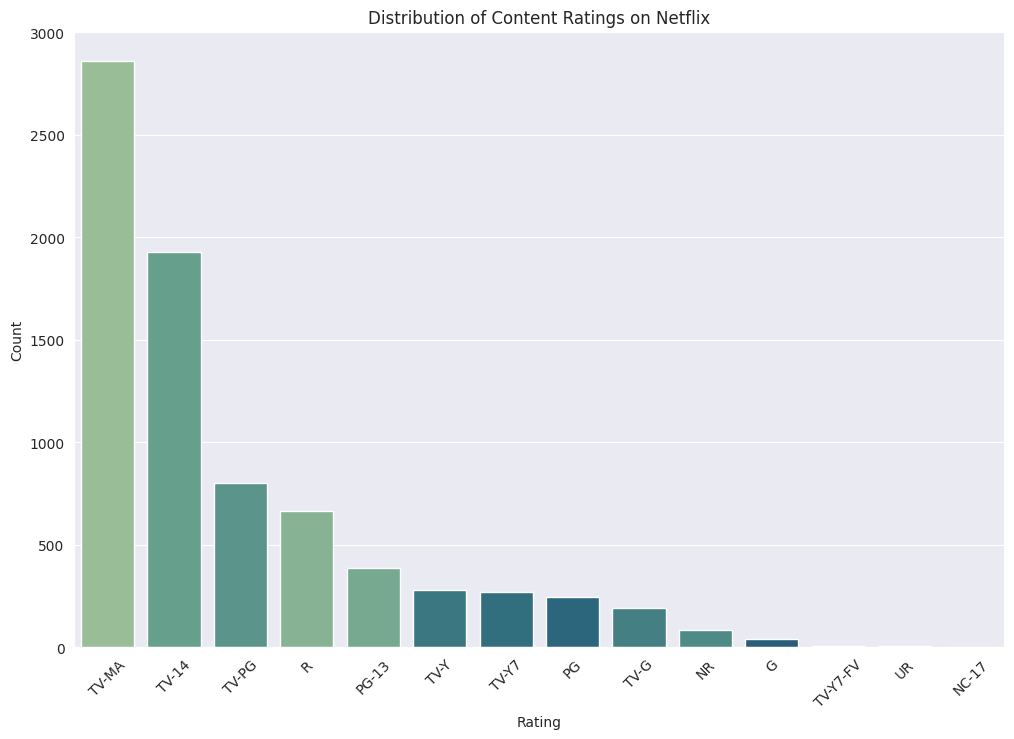

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=neflix_df, order=neflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

A large portion of Netflix's content is aimed at mature audiences, with TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (TV-G, TV-Y).

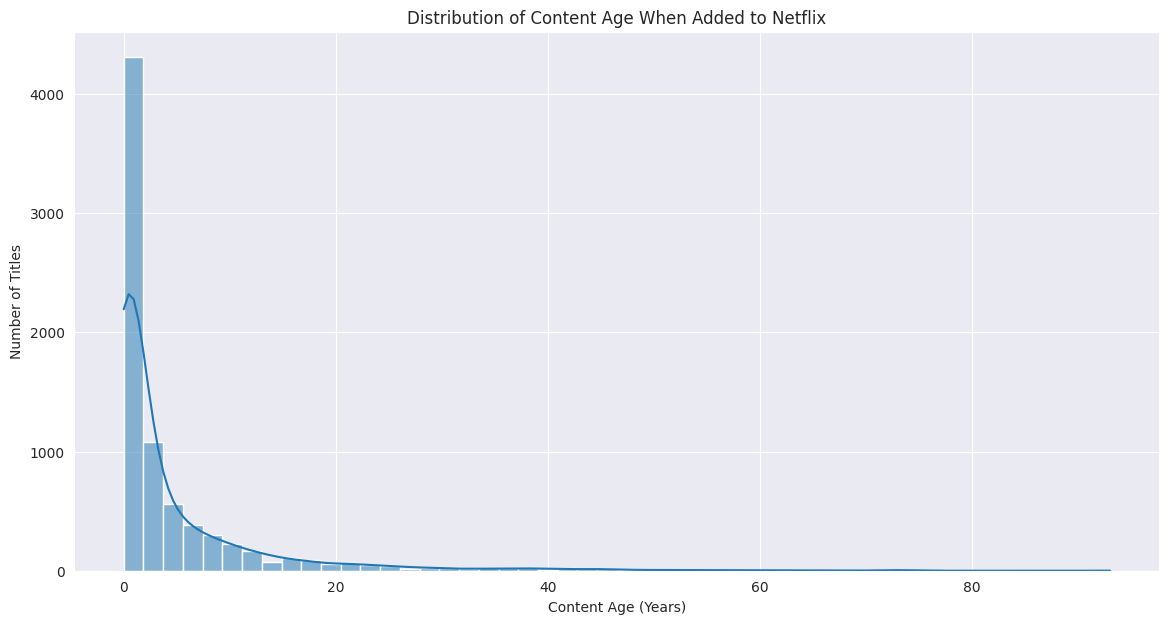

In [42]:
# Create the 'age_on_netflix' feature
neflix_df['age_on_netflix'] = neflix_df['year_added'] - neflix_df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = neflix_df[neflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

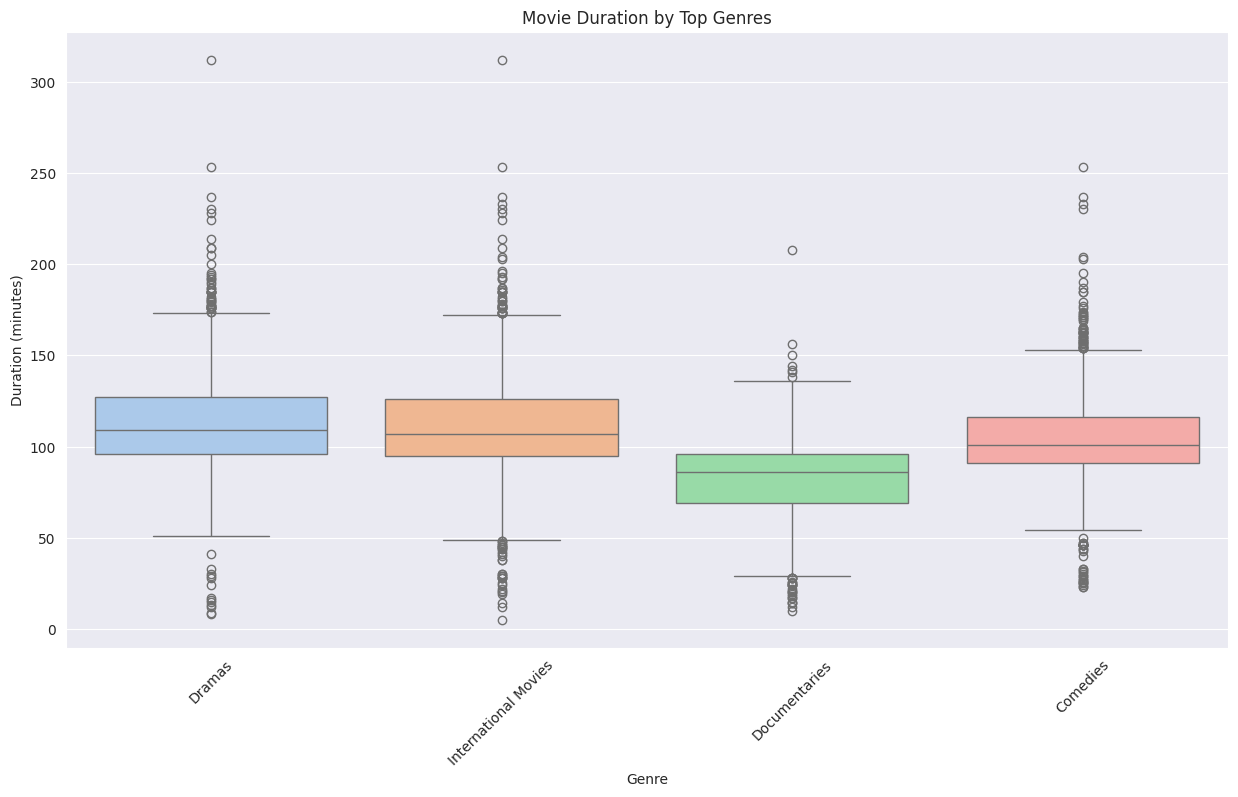

In [43]:
# Analyze movie duration across different top genres
top_genres = genre['genre'].value_counts().index[:5]
genres_movies = genre[(genre['type'] == 'Movie') & (genre['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

- Most of the content was released and added to Netflix in 2020.
- However, it is noted that the content added to Netflix was double the amount of content that was released in 2020.
- While the content was originally released between 1920 and 2020, it was only added to Netflix between 2005 and 2020.

# Word Cloud From Content Description

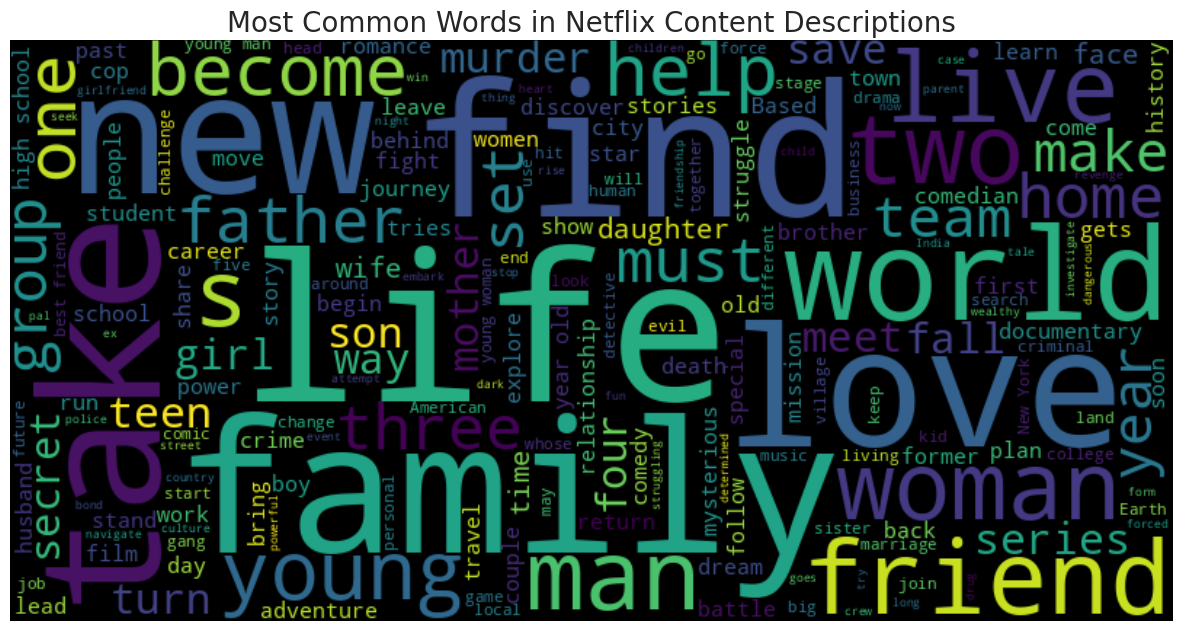

In [36]:
# Combine all descriptions into a single string
text = ' '.join(neflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

# Submission Criteria

<Figure size 1400x800 with 0 Axes>

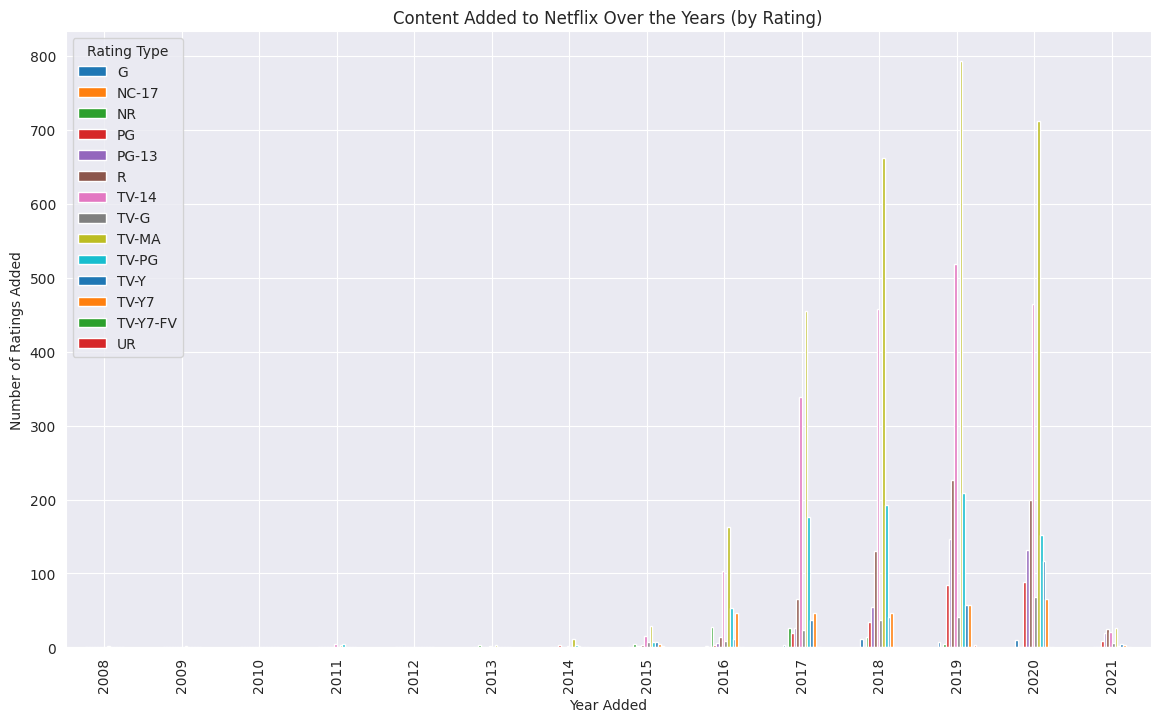

In [19]:
rating_over_time = neflix_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
rating_over_time.plot(kind='bar', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Rating)')
plt.xlabel('Year Added')
plt.ylabel('Number of Ratings Added')
plt.legend(title='Rating Type')
plt.grid(True)
plt.show()

- Starting 2016, most of the contents have the rating of TV-MA, especially 2019.
- The contents added significantly reduce in 2021

<Figure size 1400x800 with 0 Axes>

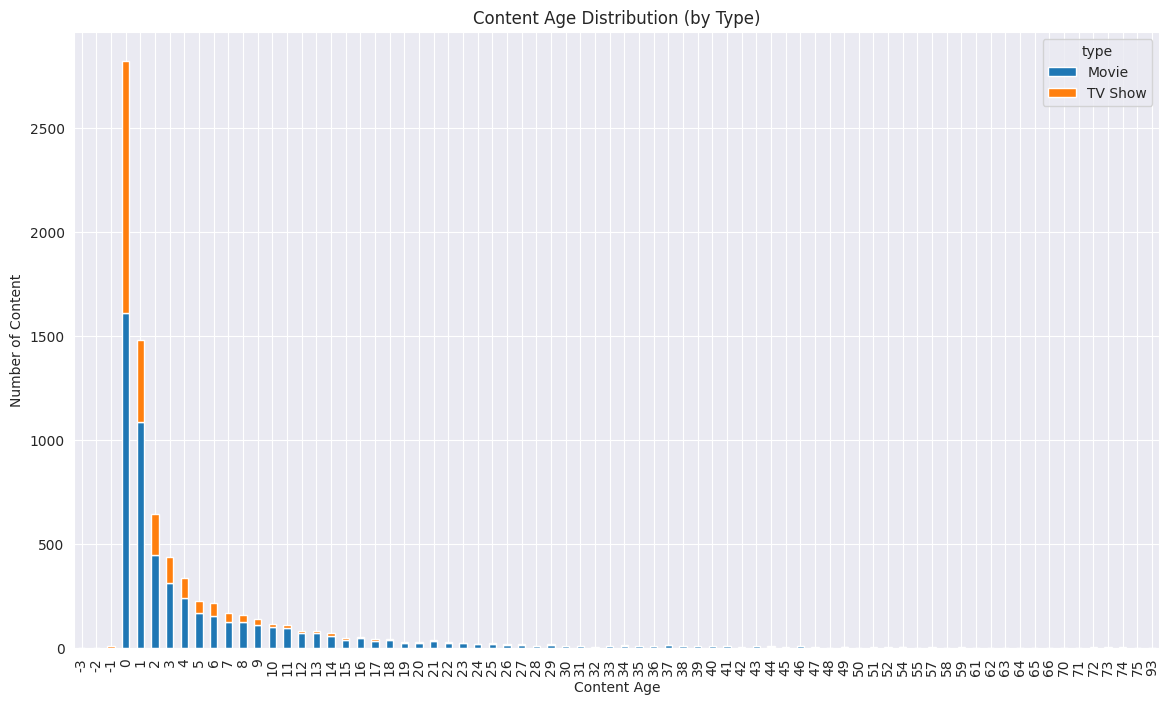

In [24]:
# Content age VS type
neflix_df['content_age'] = neflix_df['year_added'] - neflix_df['release_year']
neflix_df.head()
age_content = neflix_df.groupby(['content_age', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(14, 8))
age_content.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Content Age Distribution (by Type)')
plt.xlabel('Content Age')
plt.ylabel('Number of Content')
plt.grid(True)
plt.show()


- There are several pieces of content with an age of less than zero years, which suggests they have not yet been released, directly reflecting the Netflix's marketing and content management strategy to keep having upcoming contents.
- As the age of the content increases, the distribution of movies is significantly higher than that of television shows.

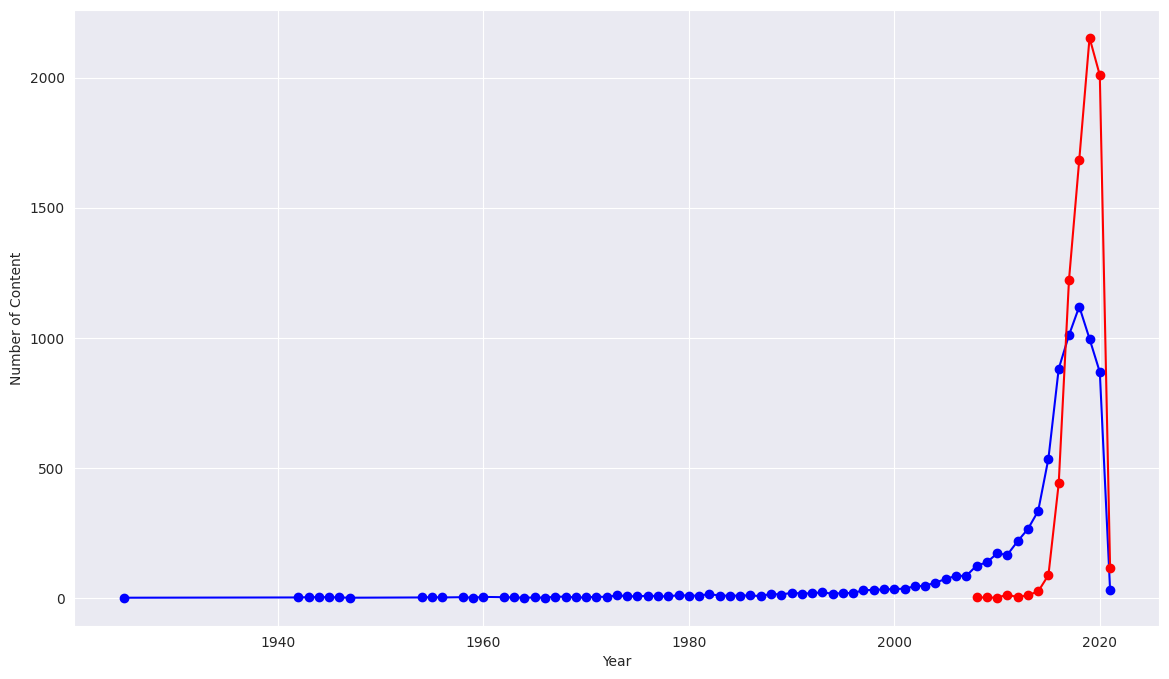

In [35]:
# Trends in content production based on the release year vs. the year added
release_year_trend = neflix_df.groupby('release_year').size()
year_added_trend = neflix_df.groupby('year_added').size()

plt.figure(figsize=(14, 8))
plt.plot(release_year_trend.index, release_year_trend.values, marker='o', linestyle='-', color='blue', label='Release Year')
plt.plot(year_added_trend.index, year_added_trend.values, marker='o', linestyle='-', color='red', label='Year Added')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.show()


In [27]:
director = neflix_df.assign(director=neflix_df['director'].str.split(', ')).explode('director')
filtered_director = director[director['director'] != 'Unknown']
director_value_counts = filtered_director['director'].value_counts().reset_index()
director_value_counts.columns=['director','count']
director_value_counts.head()

,director,count
0,Jan Suter,21
1,Raúl Campos,19
2,Marcus Raboy,16
3,Jay Karas,15
4,Cathy Garcia-Molina,13


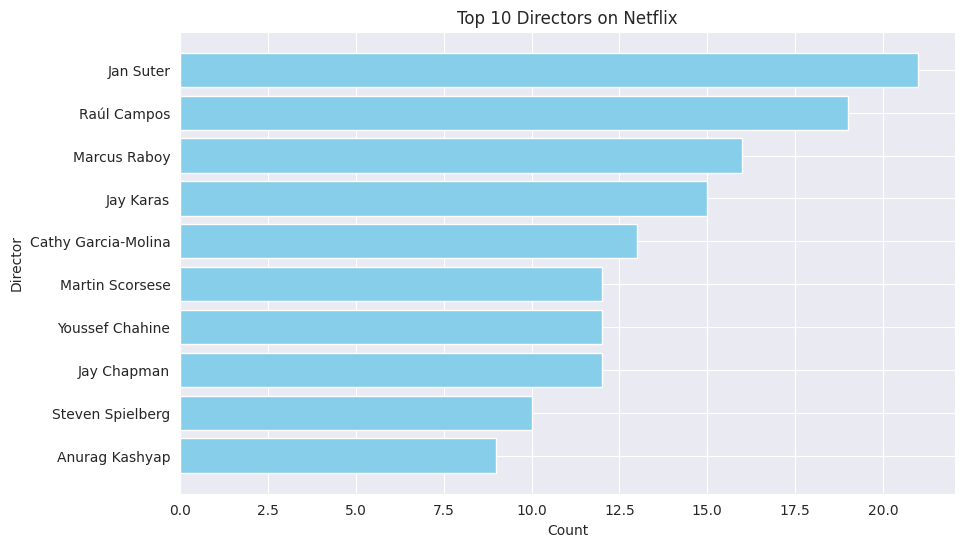

In [28]:
# Top director distribution
plt.figure(figsize=(10, 6))
plt.barh(director_value_counts['director'].head(10), director_value_counts['count'].head(10), color='skyblue')
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 10 Directors on Netflix')
plt.gca().invert_yaxis()
plt.show()